In [1]:
import numpy as np
from matplotlib import pyplot as plt
# muestra los gráficos en el mismo notebook


In [31]:
%matplotlib inline

In [2]:
# Con esto cargamos los datos
# Si vemos los archivos son dos columnas
# que vamos a guardar como x, y
data = np.loadtxt("doble_exp.dat") 

x = data[:,0]
y = data[:,1]
error_y = data[:,2]

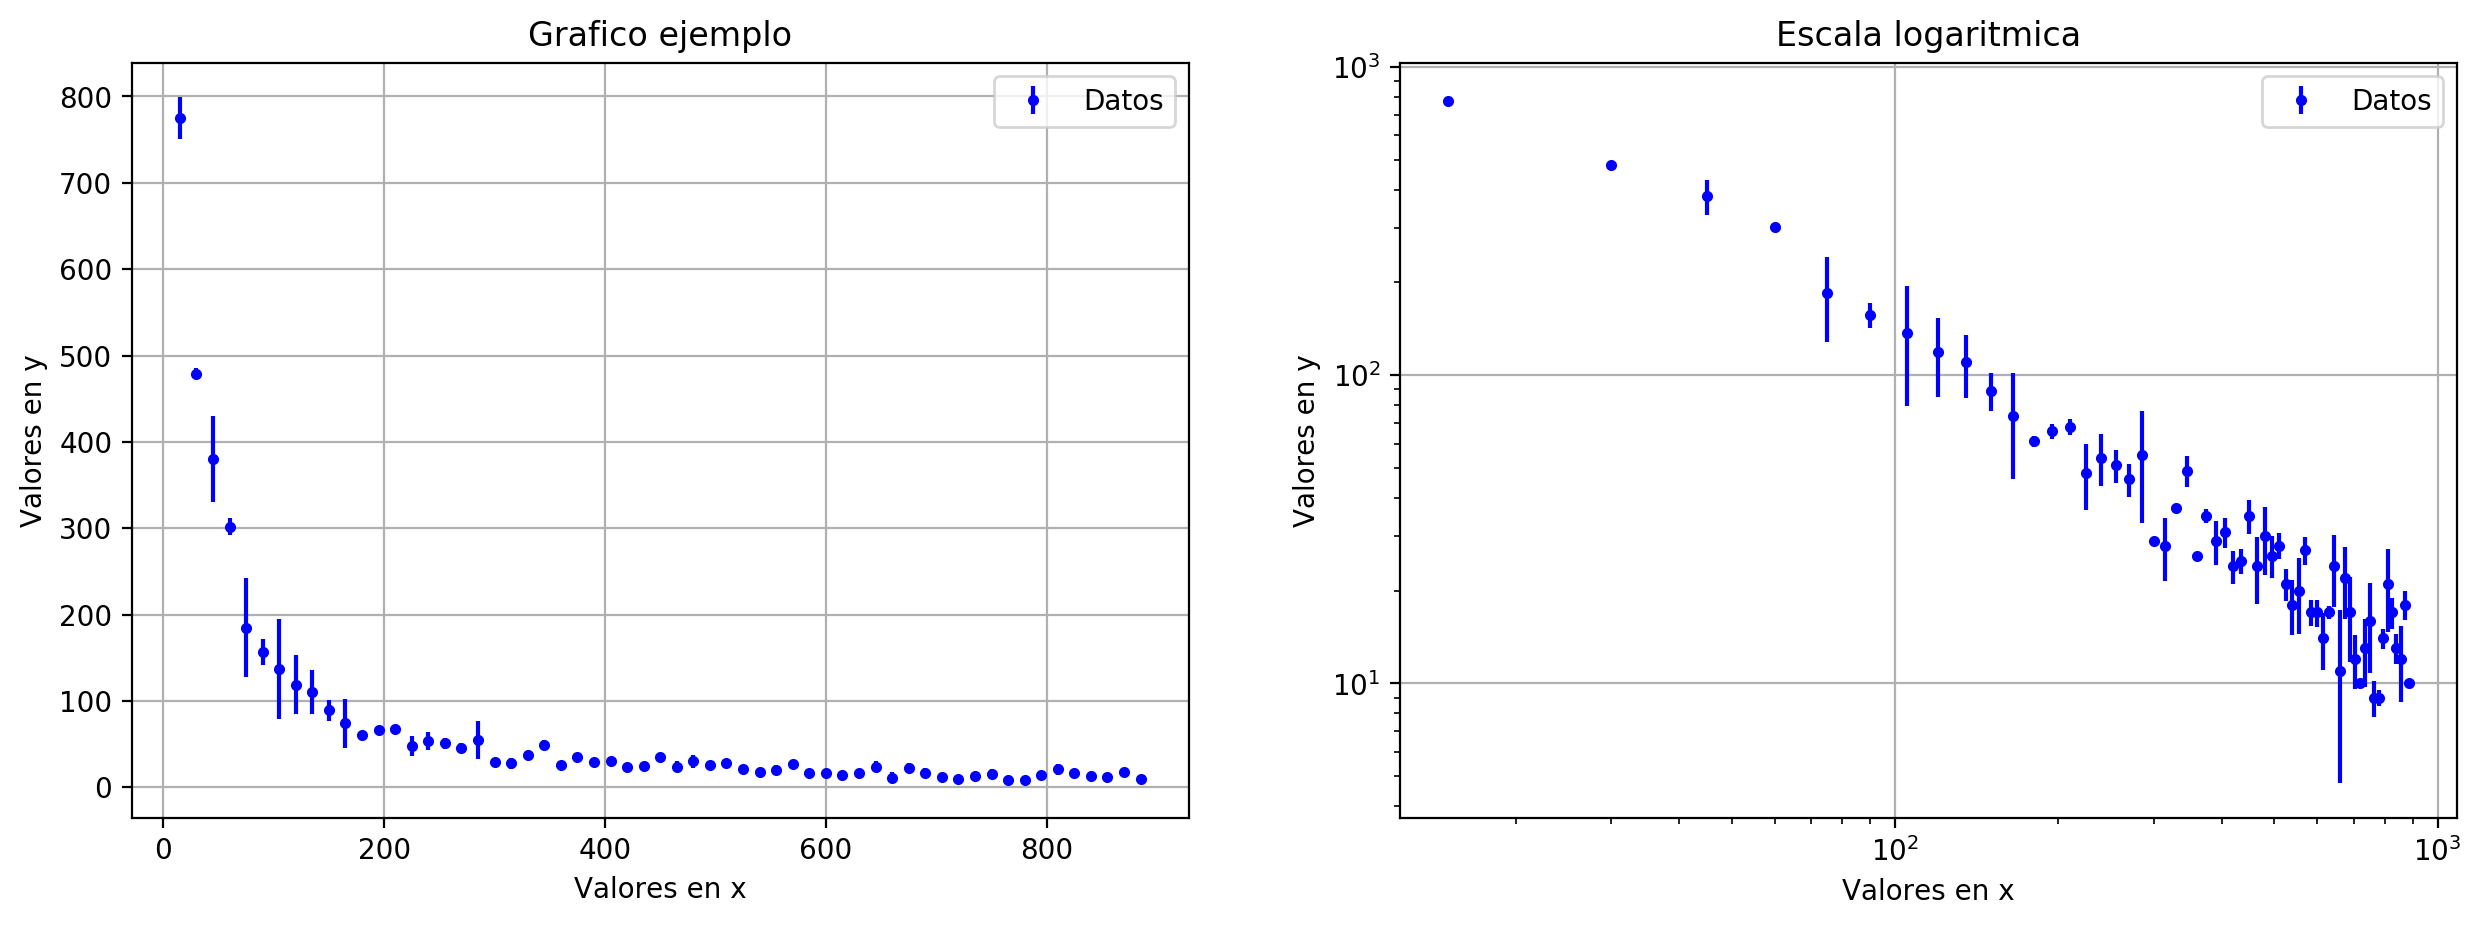

In [43]:
#,skiprows=1 si por ejemplo quiero saltear la primera fila
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(1,2,1)
plt.errorbar(x, y, yerr=error_y, fmt='b.', label="Datos")
plt.grid(True) # Para que quede en hoja cuadriculada
plt.title('Grafico ejemplo')
plt.xlabel('Valores en x')
plt.ylabel('Valores en y')
plt.legend(loc = 'best') 

plt.subplot(1,2,2)
plt.errorbar(x, y, yerr=error_y, fmt='b.', label="Datos")
plt.grid(True) # Para que quede en hoja cuadriculada
plt.yscale('log')
plt.xscale('log')
plt.title('Escala logaritmica')
plt.xlabel('Valores en x')
plt.ylabel('Valores en y')
plt.legend(loc = 'best')

plt.show() # si no usaron %matplotlib inline, esto abre una ventanita con el gráfico


In [ ]:
# Guardamos y cargamos, a modo de ejemplo

#vean que crea un archivo Datos_taller.txt
np.savetxt('Datos_taller.txt', np.log(data[:,:-1]), delimiter = '\t') #ya lo guardo para que quedew lineal

Data = np.loadtxt('Datos_taller.txt', delimiter = '\t') 

#plt.plot(Data[:,0],Data[:,1], 'r.') # Veamos que son los mismos datos, pero linealizados!
plt.errorbar(Data[:,0],Data[:,1], yerr=1/y*error_y, fmt='ro')
plt.show()

In [33]:
from scipy.optimize import curve_fit

In [44]:
f = lambda x, A, B: A * x + B

# Ajustamos, pero con las funciónes logaritmicas. Usamos propagación de errores
popt, pcov = curve_fit(f, np.log(x), np.log(y), sigma = 1/y * error_y, 
                       absolute_sigma=True)

print(popt)
print(pcov)

[-1.18030384 10.20836531]
[[ 1.88619767e-05 -1.10627982e-04]
 [-1.10627982e-04  6.51123342e-04]]


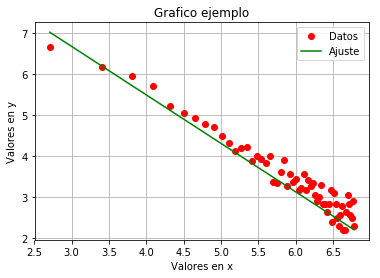

In [45]:
t = np.linspace(min(x), max(x), 1000) #Las funciones "viejas" de python siguen funcionando!
t = np.log(t) #Aplico logaritmo
plt.plot(np.log(x), np.log(y), 'ro', label = 'Datos')
plt.plot(t, f(t, *popt), 'g-', label = 'Ajuste') #grafico la función

# Detalles del gráfico
plt.grid(True)
plt.title('Grafico ejemplo')
plt.xlabel('Valores en x')
plt.ylabel('Valores en y')
plt.legend(loc = 'best')

plt.show()

<Container object of 3 artists>

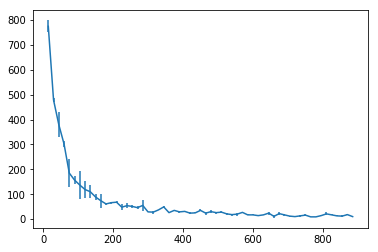

In [46]:
plt.errorbar(x,y,yerr=error_y,'.')


In [ ]:
import scipy as sp #permite generar variables aleatorias
from scipy import stats #Tengo que importar la sublibrería

In [ ]:
import pandas as pd